# Candlestick Doji Star

https://patternswizard.com/doji-star-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2020-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000


## Candlestick with Doji Star

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,737426.0,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,True
1,737427.0,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,True
2,737430.0,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,True
3,737431.0,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,False
4,737432.0,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,False


Text(0, 0.5, 'Price')

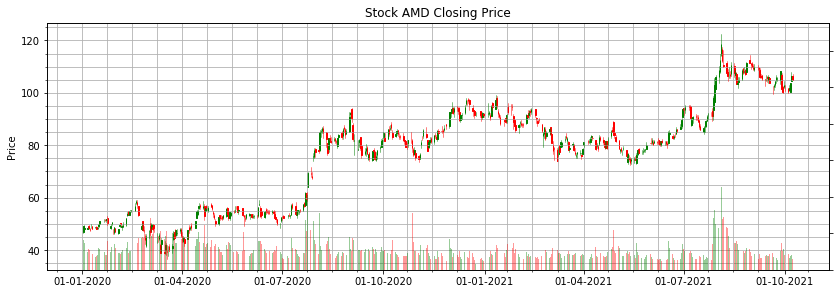

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
doji_star = talib.CDLDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])

doji_star = doji_star[doji_star != 0]

In [6]:
df['doji_star'] = talib.CDLDOJISTAR(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['doji_star'] !=0]

,Open,High,Low,Close,Adj Close,Volume,doji_star
Date,,,,,,,
2020-01-21,50.959999,51.810001,50.700001,51.049999,51.049999,49095000,-100
2020-03-02,47.419998,47.680000,44.660000,47.459999,47.459999,102324700,-100
2020-09-01,91.919998,92.510002,90.190002,92.180000,92.180000,55825600,-100
2020-10-15,83.400002,84.720001,82.419998,83.129997,83.129997,33696400,100
2021-04-08,83.320000,83.790001,82.440002,83.349998,83.349998,41925300,-100
2021-07-20,87.089996,87.769997,85.169998,87.110001,87.110001,28089000,-100
2021-08-06,110.550003,116.260002,109.699997,110.110001,110.110001,143792800,100
2021-09-20,101.580002,102.510002,99.510002,101.550003,101.550003,45228400,100


In [8]:
df['Adj Close'].loc[df['doji_star'] !=0]

Date
2020-01-21     51.049999
2020-03-02     47.459999
2020-09-01     92.180000
2020-10-15     83.129997
2021-04-08     83.349998
2021-07-20     87.110001
2021-08-06    110.110001
2021-09-20    101.550003
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['doji_star'] !=0].index

DatetimeIndex(['2020-01-21', '2020-03-02', '2020-09-01', '2020-10-15',
               '2021-04-08', '2021-07-20', '2021-08-06', '2021-09-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
doji_star

Date
2020-01-21   -100
2020-03-02   -100
2020-09-01   -100
2020-10-15    100
2021-04-08   -100
2021-07-20   -100
2021-08-06    100
2021-09-20    100
dtype: int32

In [11]:
doji_star.index

DatetimeIndex(['2020-01-21', '2020-03-02', '2020-09-01', '2020-10-15',
               '2021-04-08', '2021-07-20', '2021-08-06', '2021-09-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,doji_star
Date,,,,,,,
2020-01-02,46.860001,49.250000,46.630001,49.099998,49.099998,80331100,0
2020-01-03,48.029999,49.389999,47.540001,48.599998,48.599998,73127400,0
2020-01-06,48.020000,48.860001,47.860001,48.389999,48.389999,47934900,0
2020-01-07,49.349998,49.389999,48.040001,48.250000,48.250000,58061400,0
2020-01-08,47.849998,48.299999,47.139999,47.830002,47.830002,53767000,0
...,...,...,...,...,...,...,...
2021-10-04,101.739998,101.849998,99.820000,100.339996,100.339996,41967100,0
2021-10-05,100.919998,102.870003,100.610001,101.809998,101.809998,31455200,0
2021-10-06,100.449997,103.720001,100.349998,103.639999,103.639999,39071700,0


Text(0, 0.5, 'Price')

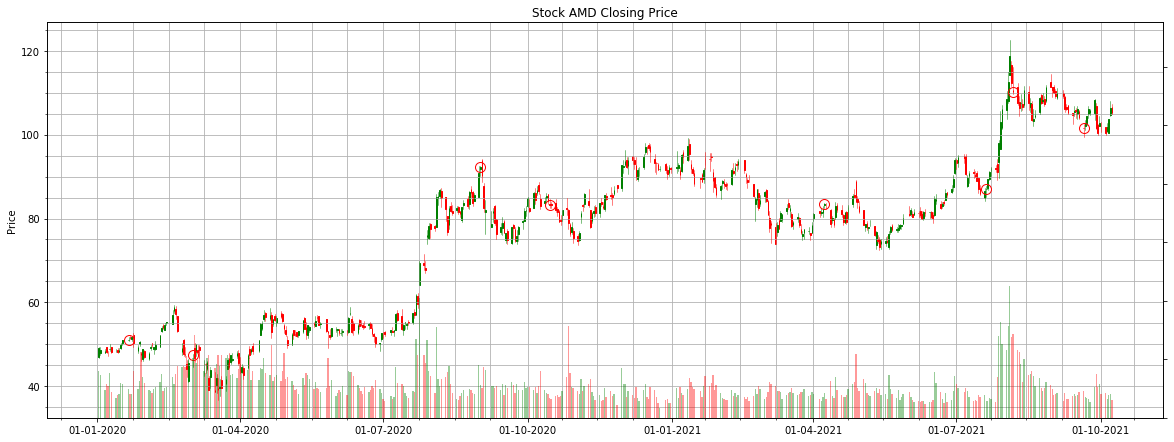

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['doji_star'] !=0].index, df['Adj Close'].loc[df['doji_star'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2021-07-01':'2021-09-01']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,doji_star,VolumePositive
0,737972.0,94.040001,94.180000,91.699997,93.309998,93.309998,58059000,0,False
1,737973.0,93.279999,95.269997,92.209999,94.699997,94.699997,51316700,0,True
2,737977.0,94.879997,95.410004,93.320000,94.470001,94.470001,44930100,0,False
3,737978.0,95.019997,95.440002,90.309998,90.540001,90.540001,51498500,0,False
4,737979.0,87.860001,90.339996,87.449997,89.739998,89.739998,45673500,0,True


Text(0, 0.5, 'Price')

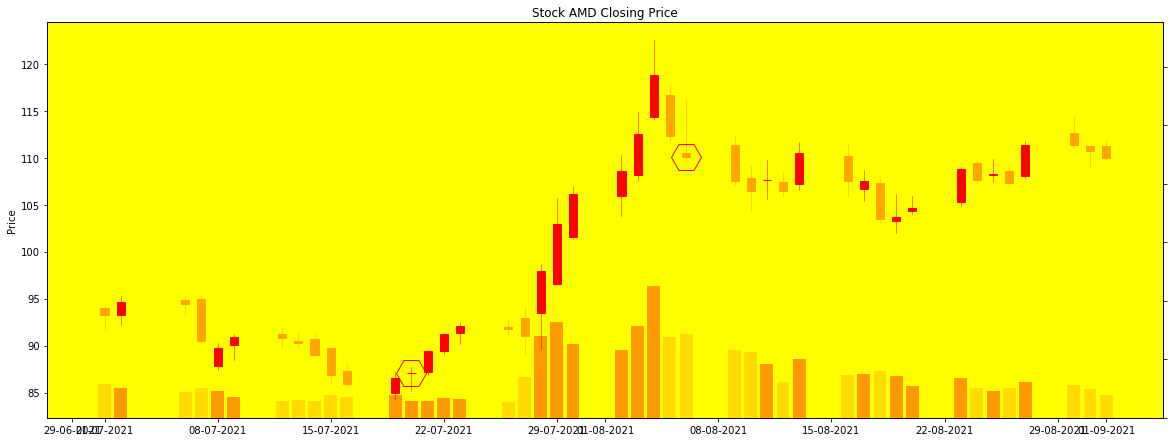

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('yellow')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='r', colordown='orange', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['doji_star'] !=0].index, df['Adj Close'].loc[df['doji_star'] !=0],
                'Hr', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'r', False: 'orange'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

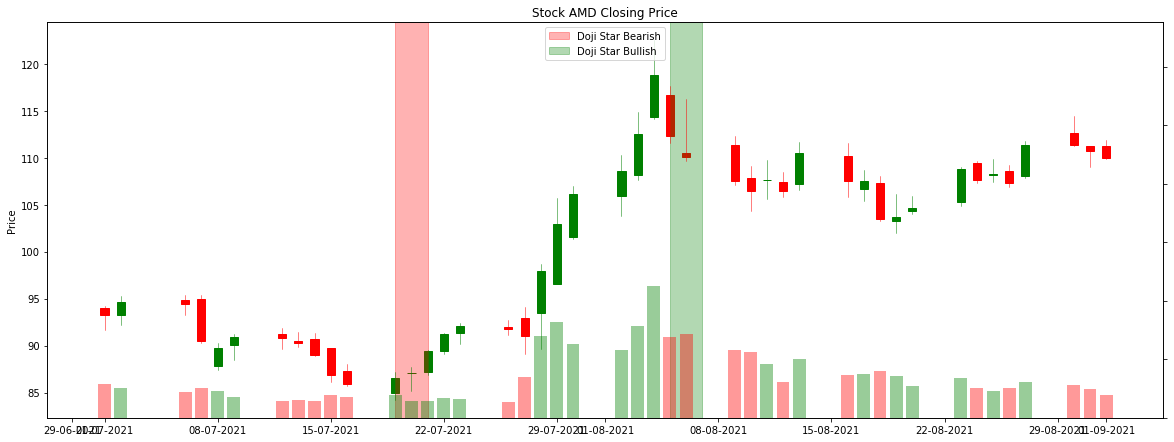

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2021,7,19)), date2num(datetime(2021,7,21)), 
           label="Doji Star Bearish",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2021,8,5)), date2num(datetime(2021,8,7)), 
           label="Doji Star Bullish",color="green", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')